### Assignment 5: Perceptron

### load the data

In [31]:
import pandas as pd
data = pd.read_csv('data.csv')

In [32]:
print(data.head)

<bound method NDFrame.head of     0.78051  -0.063669  1
0   0.28774    0.29139  1
1   0.40714    0.17878  1
2   0.29230    0.42170  1
3   0.50922    0.35256  1
4   0.27785    0.10802  1
..      ...        ... ..
94  0.77029    0.70140  0
95  0.73156    0.71782  0
96  0.44556    0.57991  0
97  0.85275    0.85987  0
98  0.51912    0.62359  0

[99 rows x 3 columns]>


In [33]:
data.describe

<bound method NDFrame.describe of     0.78051  -0.063669  1
0   0.28774    0.29139  1
1   0.40714    0.17878  1
2   0.29230    0.42170  1
3   0.50922    0.35256  1
4   0.27785    0.10802  1
..      ...        ... ..
94  0.77029    0.70140  0
95  0.73156    0.71782  0
96  0.44556    0.57991  0
97  0.85275    0.85987  0
98  0.51912    0.62359  0

[99 rows x 3 columns]>

In [34]:
data

,0.78051,-0.063669,1
0,0.28774,0.29139,1
1,0.40714,0.17878,1
2,0.29230,0.42170,1
3,0.50922,0.35256,1
4,0.27785,0.10802,1
...,...,...,...
94,0.77029,0.70140,0
95,0.73156,0.71782,0
96,0.44556,0.57991,0
97,0.85275,0.85987,0


## Part 1

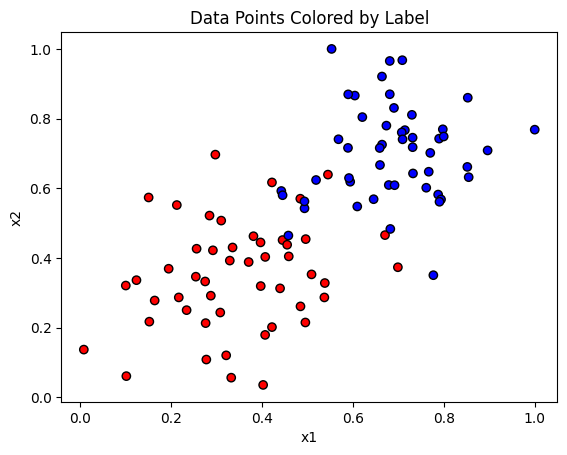

In [35]:
import matplotlib.pyplot as plt

# Scatter plot with labels
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data.iloc[:, 2], cmap='bwr', edgecolor='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data Points Colored by Label')
plt.show()


The visual above is a scatter plot of the provided dataset "data.csv". Based on column 2 (0 for blue and 1 for 1red).

In [36]:
#get the data
data = pd.read_csv('data.csv')
X = data.iloc[:, :2].values 
y = data.iloc[:, 2].values   

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Start a perceptron with random weights and bias: w1, w2, …, wn, b
np.random.seed(42)
weights = np.random.uniform(-0.5, 0.5, 2)
bias = np.random.uniform(-0.5, 0.5)

# parameters
learning_rate = 1
epochs = 65
lines = []

For each of all points (data) with their corresponding labels (answers):  
- Classify according to the perceptron  
- For a misclassified point (x1,x2, …, xn) :
    - If classification==0:  
      b + r → b
      For all wi: wi+ rxi → wi
    - If classification==1:  
      b - r → b  
      For all wi: wi- rxi → wi


In [38]:
for epoch in range(epochs):
    for i in range(len(X)):
        xi = X[i]
        target = y[i]

        # perceptron classify
        linear_output = np.dot(weights, xi) + bias
        prediction = 1 if linear_output >= 0 else 0

        # For misclassified
        if prediction != target:
            r = learning_rate
            if prediction == 0:
                bias += r
                weights += r * xi
            else:  
                bias -= r
                weights -= r * xi

   
    lines.append((weights.copy(), bias))

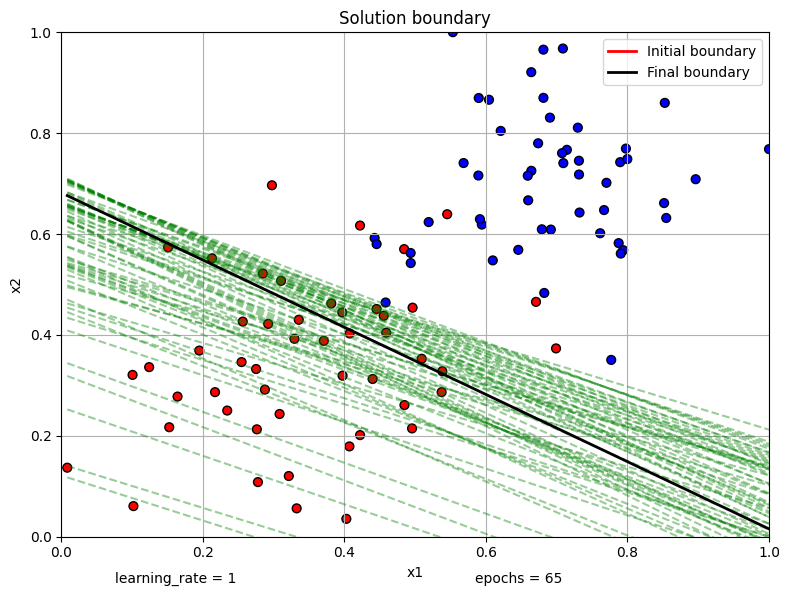

In [39]:
def plot_decision_lines(X, y, lines):
    plt.figure(figsize=(8, 6))
    plt.title("Solution boundary")

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=40)

    x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 200)

    for i, (w, b) in enumerate(lines):
        if w[1] == 0: continue  
        y_vals = -(w[0] * x_vals + b) / w[1]

        if i == 0:
            plt.plot(x_vals, y_vals, 'r-', linewidth=2, label='Initial boundary')
        elif i == len(lines) - 1:
            plt.plot(x_vals, y_vals, 'k-', linewidth=2, label='Final boundary')
        else:
            plt.plot(x_vals, y_vals, 'g--', alpha=0.4)

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.ylim(0, 1.0)
    plt.xlim(0, 1.0)
    plt.legend()
    plt.grid(True)

    plt.figtext(0.15, 0.02, 'learning_rate = 1', fontsize=10)
    plt.figtext(0.6, 0.02, 'epochs = 65', fontsize=10)

    plt.tight_layout()
    plt.show()
    
plot_decision_lines(X, y, lines)

## ANALYSIS: 
The graph above was produced using a learning rate of 1 over 65 epochs. The dense set of green dashed lines indicates that the model made frequent updates, suggesting that many misclassifications occurred during training. These frequent and bold corrections are a result of the high learning rate, which caused the decision boundary to adjust aggressively. Despite the noisy learning path, the final decision boundary (black) successfully separates the two classes, although a few misclassified points (impurities) remain. 

# updating learning rate to 1 for 100 epochs

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Start a perceptron with random weights and bias: w1, w2, …, wn, b
np.random.seed(42)
weights = np.random.uniform(-0.5, 0.5, 2)
bias = np.random.uniform(-0.5, 0.5)

# parameters
learning_rate = 1
epochs = 100
lines = []

In [41]:
for epoch in range(epochs):
    total_errors = 0
    for i in range(len(X)):
        xi = X[i]
        target = y[i]

        # perceptron classify
        linear_output = np.dot(weights, xi) + bias
        prediction = 1 if linear_output >= 0 else 0

        # For misclassified
        if prediction != target:
            r = learning_rate
            if prediction == 0:
                bias += r
                weights += r * xi
            else:  
                bias -= r
                weights -= r * xi

   
    lines.append((weights.copy(), bias))

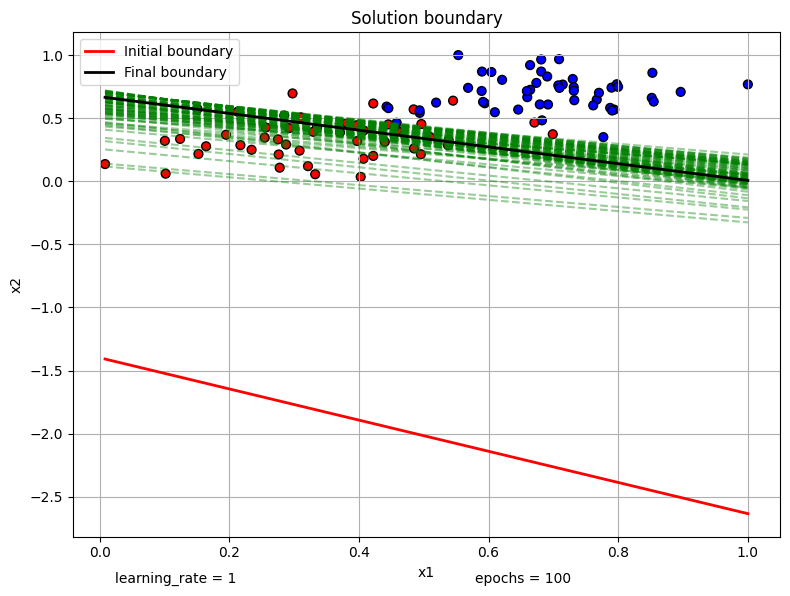

In [42]:
def plot_decision_lines(X, y, lines):
    plt.figure(figsize=(8, 6))
    plt.title("Solution boundary")

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=40)

    x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 200)

    for i, (w, b) in enumerate(lines):
        if w[1] == 0: continue  
        y_vals = -(w[0] * x_vals + b) / w[1]

        if i == 0:
            plt.plot(x_vals, y_vals, 'r-', linewidth=2, label='Initial boundary')
        elif i == len(lines) - 1:
            plt.plot(x_vals, y_vals, 'k-', linewidth=2, label='Final boundary')
        else:
            plt.plot(x_vals, y_vals, 'g--', alpha=0.4)

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.grid(True)


    plt.figtext(0.15, 0.02, 'learning_rate = 1', fontsize=10)
    plt.figtext(0.6, 0.02, 'epochs = 100', fontsize=10)

    plt.tight_layout()
    plt.show()
    
plot_decision_lines(X, y, lines)

## ANALYSIS  
The graph above was produced using a learning rate of 1 over 100 epochs. Compared to previous run with 65 epochs, this model went with significantly more updates which results in dense green lines. Therefoe this suggests that the high learning rate continued to trigger frequent, aggressive boundary corrections throughout the training process. Decision boundary appears to positioned well with few misclassifications

## updating learning rate to 0.1 for 65 epochs¶

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Start a perceptron with random weights and bias: w1, w2, …, wn, b
np.random.seed(42)
weights = np.random.uniform(-0.5, 0.5, 2)
bias = np.random.uniform(-0.5, 0.5)

# parameters
learning_rate = 0.1
epochs = 65
lines = []

In [48]:
for epoch in range(epochs):
    total_errors = 0
    for i in range(len(X)):
        xi = X[i]
        target = y[i]

        # perceptron classify
        linear_output = np.dot(weights, xi) + bias
        prediction = 1 if linear_output >= 0 else 0

        # For misclassified
        if prediction != target:
            r = learning_rate
            if prediction == 0:
                bias += r
                weights += r * xi
            else:  
                bias -= r
                weights -= r * xi

   
    lines.append((weights.copy(), bias))

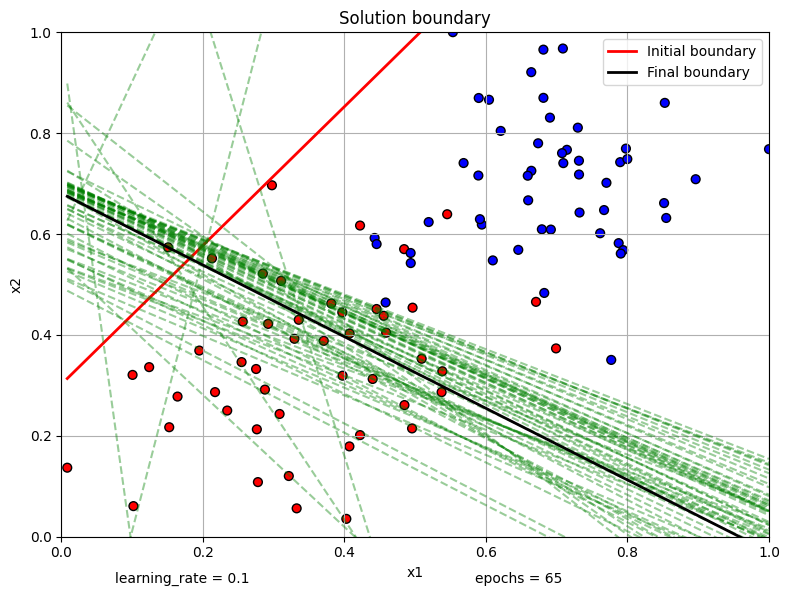

In [49]:
def plot_decision_lines(X, y, lines):
    plt.figure(figsize=(8, 6))
    plt.title("Solution boundary")

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=40)

    x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 200)

    for i, (w, b) in enumerate(lines):
        if w[1] == 0: continue  
        y_vals = -(w[0] * x_vals + b) / w[1]

        if i == 0:
            plt.plot(x_vals, y_vals, 'r-', linewidth=2, label='Initial boundary')
        elif i == len(lines) - 1:
            plt.plot(x_vals, y_vals, 'k-', linewidth=2, label='Final boundary')
        else:
            plt.plot(x_vals, y_vals, 'g--', alpha=0.4)

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.ylim(0, 1.0)
    plt.xlim(0, 1.0)
    plt.legend()
    plt.grid(True)

    plt.figtext(0.15, 0.02, 'learning_rate = 0.1', fontsize=10)
    plt.figtext(0.6, 0.02, 'epochs = 65', fontsize=10)

    plt.tight_layout()
    plt.show()
    
plot_decision_lines(X, y, lines)

## ANALYSIS  
The graph shows the perceptron’s performance using a learning rate of 0.1 over 65 epochs. The initial boundary is far from ideal, but the model gradually shifts toward an effective solution through a series of fine-tuned adjustments. The final decision boundary aligns well between the blue and red classes with few missclassified points

## updating learning rate to 0.1 for 200 epochs¶

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Start a perceptron with random weights and bias: w1, w2, …, wn, b
np.random.seed(42)
weights = np.random.uniform(-0.5, 0.5, 2)
bias = np.random.uniform(-0.5, 0.5)

# parameters
learning_rate = 0.1
epochs = 200
lines = []

In [51]:
for epoch in range(epochs):
    for i in range(len(X)):
        xi = X[i]
        target = y[i]

        # perceptron classify
        linear_output = np.dot(weights, xi) + bias
        prediction = 1 if linear_output >= 0 else 0

        # For misclassified
        if prediction != target:
            r = learning_rate
            if prediction == 0:
                bias += r
                weights += r * xi
            else:  
                bias -= r
                weights -= r * xi

   
    lines.append((weights.copy(), bias))

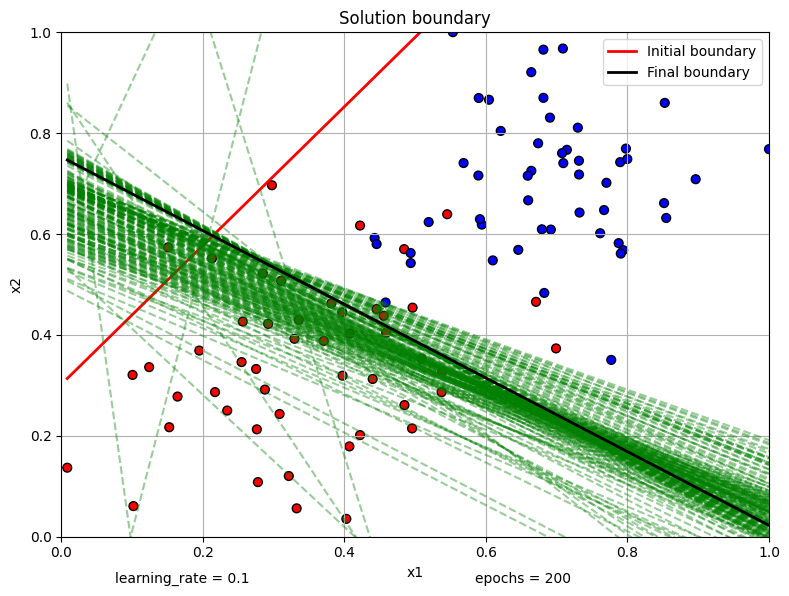

In [53]:
def plot_decision_lines(X, y, lines):
    plt.figure(figsize=(8, 6))
    plt.title("Solution boundary")

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=40)

    x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 200)

    for i, (w, b) in enumerate(lines):
        if w[1] == 0: continue  
        y_vals = -(w[0] * x_vals + b) / w[1]

        if i == 0:
            plt.plot(x_vals, y_vals, 'r-', linewidth=2, label='Initial boundary')
        elif i == len(lines) - 1:
            plt.plot(x_vals, y_vals, 'k-', linewidth=2, label='Final boundary')
        else:
            plt.plot(x_vals, y_vals, 'g--', alpha=0.4)

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.ylim(0, 1.0)
    plt.xlim(0, 1.0)
    plt.legend()
    plt.grid(True)

    plt.figtext(0.15, 0.02, 'learning_rate = 0.1', fontsize=10)
    plt.figtext(0.6, 0.02, 'epochs = 200', fontsize=10)

    plt.tight_layout()
    plt.show()
    
plot_decision_lines(X, y, lines)

## ANALYSIS
The perceptron’s performance with a learning rate of 0.1 and 200 epochs reveals a stable and incremental learning process. The numerous green dashed lines represent small, controlled updates, indicating that the model adjusted. Compared to previous run the decision boundary is well positioned between the 2 classes with fewer misclassifications. 

## updating learning rate to 0.01 for 65 epochs¶

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Start a perceptron with random weights and bias: w1, w2, …, wn, b
np.random.seed(42)
weights = np.random.uniform(-0.5, 0.5, 2)
bias = np.random.uniform(-0.5, 0.5)

# parameters
learning_rate = 0.01
epochs = 65
lines = []

In [55]:
for epoch in range(epochs):
    for i in range(len(X)):
        xi = X[i]
        target = y[i]

        # perceptron classify
        linear_output = np.dot(weights, xi) + bias
        prediction = 1 if linear_output >= 0 else 0

        # For misclassified
        if prediction != target:
            r = learning_rate
            if prediction == 0:
                bias += r
                weights += r * xi
            else:  
                bias -= r
                weights -= r * xi

   
    lines.append((weights.copy(), bias))

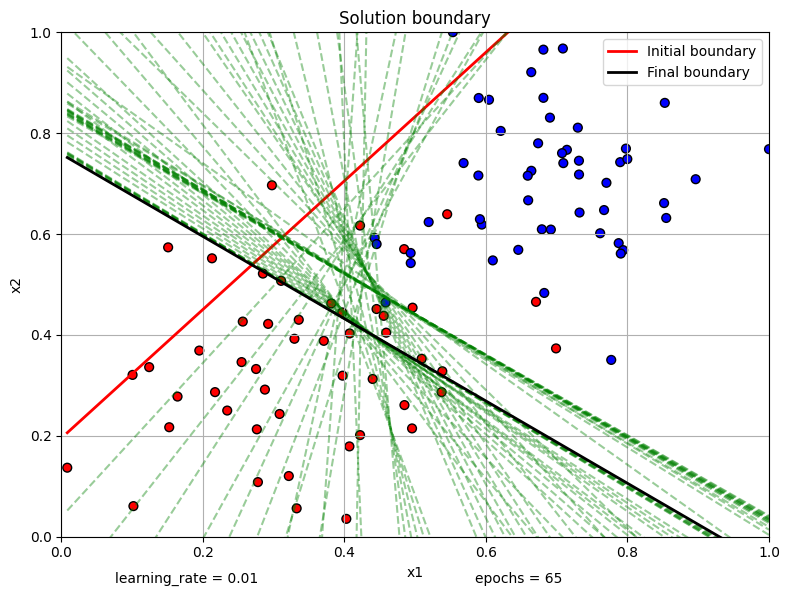

In [56]:
def plot_decision_lines(X, y, lines):
    plt.figure(figsize=(8, 6))
    plt.title("Solution boundary")

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=40)

    x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 200)

    for i, (w, b) in enumerate(lines):
        if w[1] == 0: continue  
        y_vals = -(w[0] * x_vals + b) / w[1]

        if i == 0:
            plt.plot(x_vals, y_vals, 'r-', linewidth=2, label='Initial boundary')
        elif i == len(lines) - 1:
            plt.plot(x_vals, y_vals, 'k-', linewidth=2, label='Final boundary')
        else:
            plt.plot(x_vals, y_vals, 'g--', alpha=0.4)

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.ylim(0, 1.0)
    plt.xlim(0, 1.0)
    plt.legend()
    plt.grid(True)

    plt.figtext(0.15, 0.02, 'learning_rate = 0.01', fontsize=10)
    plt.figtext(0.6, 0.02, 'epochs = 65', fontsize=10)

    plt.tight_layout()
    plt.show()
    
plot_decision_lines(X, y, lines)

## ANALYSIS  
With a learning rate of 0.01 and 65 epochs, the perceptron struggles to converge efficiently. The green dashed lines appear scattered and overly dense near the center, reflecting the model’s minimal progress per update. The low learning rate prevents overshooting but also causes the model to take many small, indecisive steps without stabilizing quickly. The decision boundary does not separate the 2 classes very accurately it may require more number of epochs for better result.

## updating learning rate to 0.01 for 100 epochs

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Start a perceptron with random weights and bias: w1, w2, …, wn, b
np.random.seed(42)
weights = np.random.uniform(-0.5, 0.5, 2)
bias = np.random.uniform(-0.5, 0.5)

# parameters
learning_rate = 0.01
epochs = 100
lines = []

In [58]:
for epoch in range(epochs):
    for i in range(len(X)):
        xi = X[i]
        target = y[i]

        # perceptron classify
        linear_output = np.dot(weights, xi) + bias
        prediction = 1 if linear_output >= 0 else 0

        # For misclassified
        if prediction != target:
            r = learning_rate
            if prediction == 0:
                bias += r
                weights += r * xi
            else:  
                bias -= r
                weights -= r * xi

   
    lines.append((weights.copy(), bias))

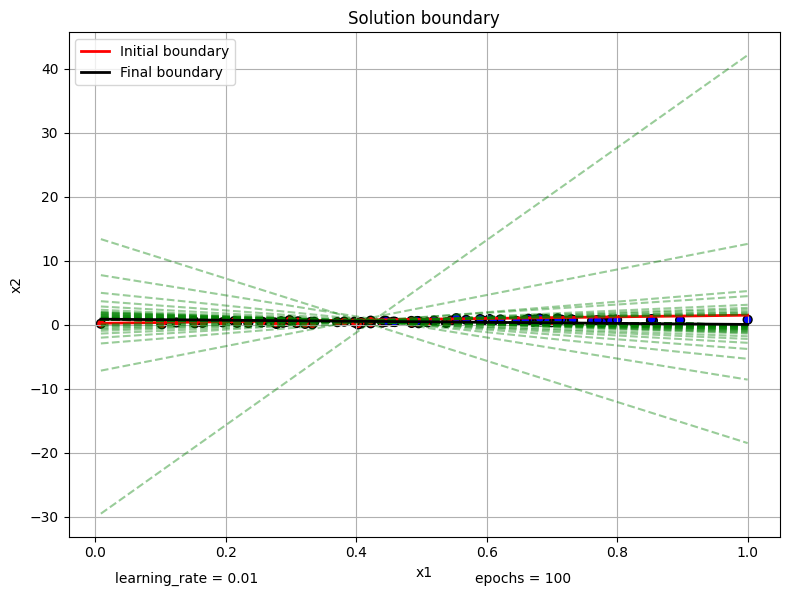

In [59]:
def plot_decision_lines(X, y, lines):
    plt.figure(figsize=(8, 6))
    plt.title("Solution boundary")

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=40)

    x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 200)

    for i, (w, b) in enumerate(lines):
        if w[1] == 0: continue  
        y_vals = -(w[0] * x_vals + b) / w[1]

        if i == 0:
            plt.plot(x_vals, y_vals, 'r-', linewidth=2, label='Initial boundary')
        elif i == len(lines) - 1:
            plt.plot(x_vals, y_vals, 'k-', linewidth=2, label='Final boundary')
        else:
            plt.plot(x_vals, y_vals, 'g--', alpha=0.4)

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.grid(True)


    plt.figtext(0.15, 0.02, 'learning_rate = 0.01', fontsize=10)
    plt.figtext(0.6, 0.02, 'epochs = 100', fontsize=10)

    plt.tight_layout()
    plt.show()
    
plot_decision_lines(X, y, lines)

# PART 2: Gradient Descent based updates

In [60]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def gradient_descent_based(X, y, lr=1, epochs=100):
    weights = np.random.uniform(-0.5, 0.5, X.shape[1])
    bias = np.random.uniform(-0.5, 0.5)
    lines = [(weights.copy(), bias)]
    error_list = []

    for epoch in range(epochs):
        total_error = 0
        for i in range(len(X)):
            xi = X[i]
            target = y[i]
            
            linear_output = np.dot(weights, xi) + bias
            y_pred = sigmoid(linear_output)
            
            error = target - y_pred
            total_error += error ** 2
            
            bias += lr * error
            weights += lr * error * xi
        
        lines.append((weights.copy(), bias)) 
        error_list.append(total_error / len(X))

    return lines, error_list


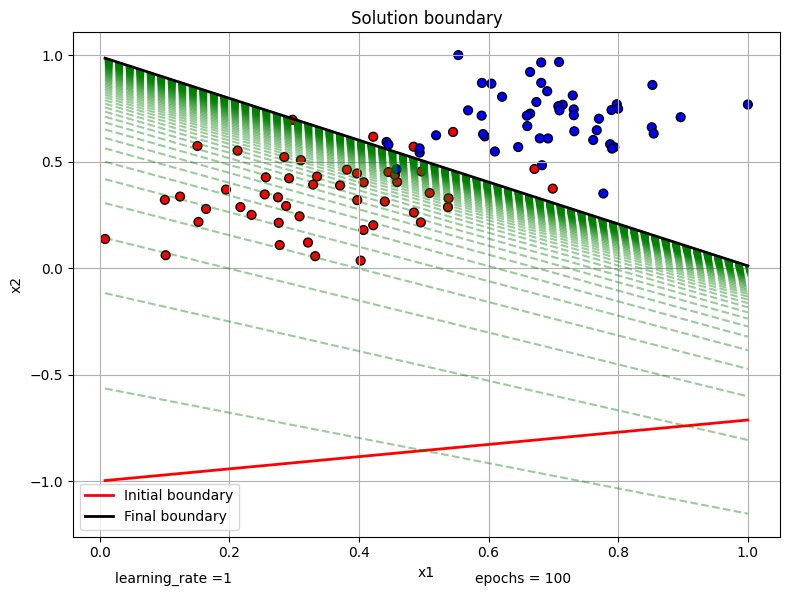

In [61]:
def plot_decision_lines(X, y, lines):
    plt.figure(figsize=(8, 6))
    plt.title("Solution boundary")

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=40)

    x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 200)

    for i, (w, b) in enumerate(lines):
        if w[1] == 0: continue  
        y_vals = -(w[0] * x_vals + b) / w[1]

        if i == 0:
            plt.plot(x_vals, y_vals, 'r-', linewidth=2, label='Initial boundary')
        elif i == len(lines) - 1:
            plt.plot(x_vals, y_vals, 'k-', linewidth=2, label='Final boundary')
        else:
            plt.plot(x_vals, y_vals, 'g--', alpha=0.4)

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.grid(True)


    plt.figtext(0.15, 0.02, 'learning_rate =1', fontsize=10)
    plt.figtext(0.6, 0.02, 'epochs = 100', fontsize=10)

    plt.tight_layout()
    plt.show()
    
lines, error_list = gradient_descent_based(X, y, lr=0.1, epochs=100)   
plot_decision_lines(X, y, lines)

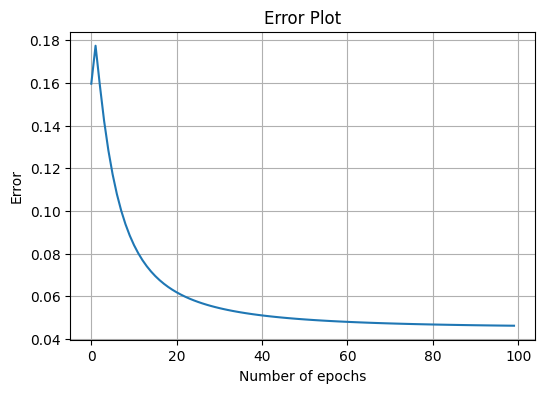

In [62]:
def plot_error_curve(error_list):
    plt.figure(figsize=(6, 4))
    plt.plot(range(len(error_list)), error_list)
    plt.title("Error Plot")
    plt.xlabel("Number of epochs")
    plt.ylabel("Error")
    plt.grid(True)
    plt.show()
plot_error_curve(error_list)

## updating learning rate to 0.1 for 100 epochs

In [63]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def gradient_descent_based(X, y, lr=0.1, epochs=100):
    weights = np.random.uniform(-0.5, 0.5, X.shape[1])
    bias = np.random.uniform(-0.5, 0.5)
    lines = [(weights.copy(), bias)]
    error_list = []

    for epoch in range(epochs):
        total_error = 0
        for i in range(len(X)):
            xi = X[i]
            target = y[i]
            
            linear_output = np.dot(weights, xi) + bias
            y_pred = sigmoid(linear_output)
            
            error = target - y_pred
            total_error += error ** 2
            
            bias += lr * error
            weights += lr * error * xi
        
        lines.append((weights.copy(), bias)) 
        error_list.append(total_error / len(X))

    return lines, error_list

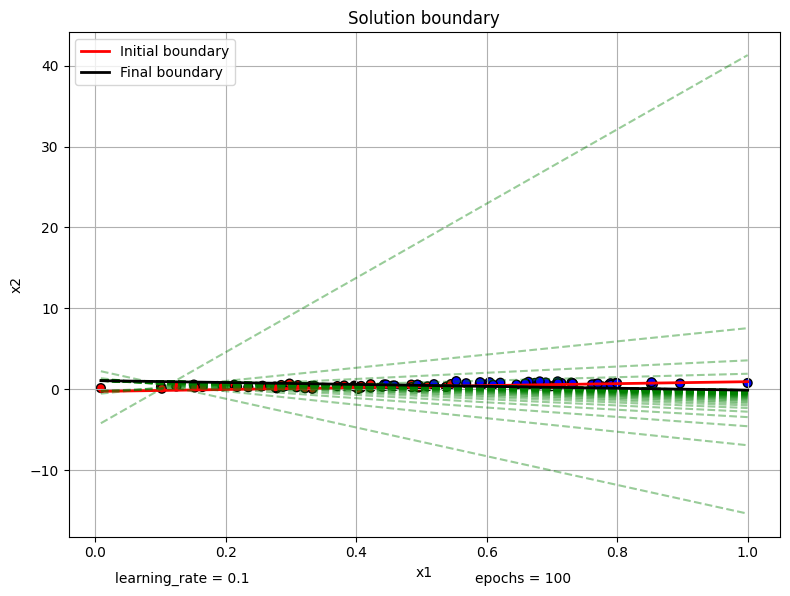

In [64]:
def plot_decision_lines(X, y, lines):
    plt.figure(figsize=(8, 6))
    plt.title("Solution boundary")

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=40)

    x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 200)

    for i, (w, b) in enumerate(lines):
        if w[1] == 0: continue  
        y_vals = -(w[0] * x_vals + b) / w[1]

        if i == 0:
            plt.plot(x_vals, y_vals, 'r-', linewidth=2, label='Initial boundary')
        elif i == len(lines) - 1:
            plt.plot(x_vals, y_vals, 'k-', linewidth=2, label='Final boundary')
        else:
            plt.plot(x_vals, y_vals, 'g--', alpha=0.4)

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.grid(True)


    plt.figtext(0.15, 0.02, 'learning_rate = 0.1', fontsize=10)
    plt.figtext(0.6, 0.02, 'epochs = 100', fontsize=10)

    plt.tight_layout()
    plt.show()

lines, error_list = gradient_descent_based(X, y, lr=0.01, epochs=100) 
plot_decision_lines(X, y, lines)

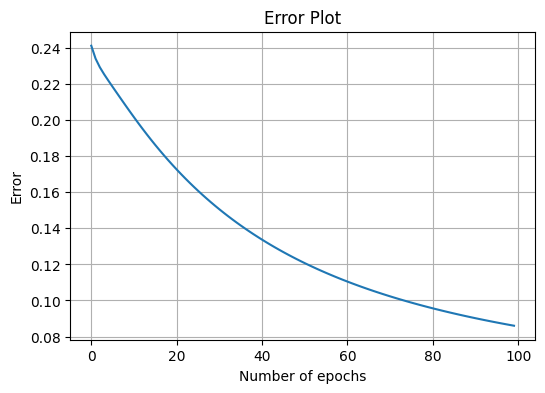

In [65]:
def plot_error_curve(error_list):
    plt.figure(figsize=(6, 4))
    plt.plot(range(len(error_list)), error_list)
    plt.title("Error Plot")
    plt.xlabel("Number of epochs")
    plt.ylabel("Error")
    plt.grid(True)
    plt.show()
plot_error_curve(error_list)

## updating learning rate to 0.01 for 100 epochs

In [71]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def gradient_descent_based(X, y, lr=0.01, epochs=100):
    weights = np.random.uniform(-0.5, 0.5, X.shape[1])
    bias = np.random.uniform(-0.5, 0.5)
    lines = [(weights.copy(), bias)]
    error_list = []

    for epoch in range(epochs):
        total_error = 0
        for i in range(len(X)):
            xi = X[i]
            target = y[i]
            
            linear_output = np.dot(weights, xi) + bias
            y_pred = sigmoid(linear_output)
            
            error = target - y_pred
            total_error += error ** 2
            
            bias += lr * error
            weights += lr * error * xi
        
        lines.append((weights.copy(), bias)) 
        error_list.append(total_error / len(X))

    return lines, error_list

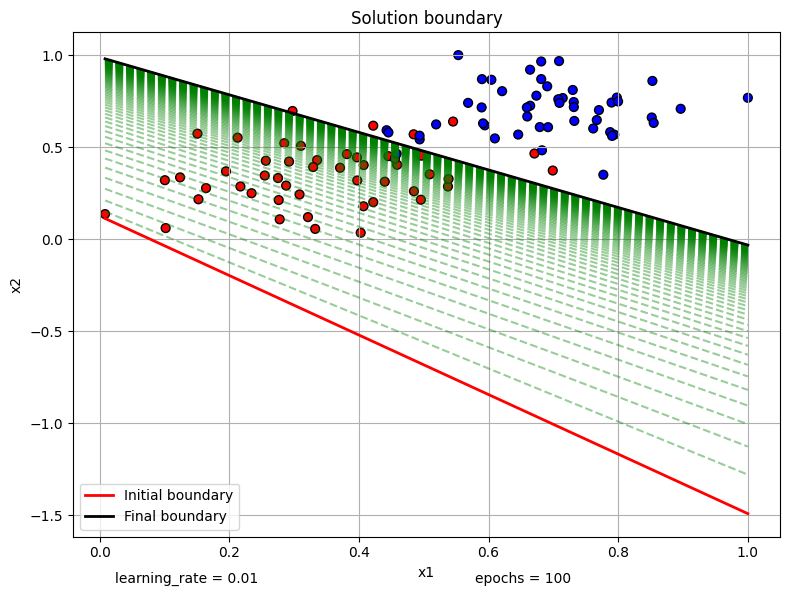

In [72]:
def plot_decision_lines(X, y, lines):
    plt.figure(figsize=(8, 6))
    plt.title("Solution boundary")

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=40)

    x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 200)

    for i, (w, b) in enumerate(lines):
        if w[1] == 0: continue  
        y_vals = -(w[0] * x_vals + b) / w[1]

        if i == 0:
            plt.plot(x_vals, y_vals, 'r-', linewidth=2, label='Initial boundary')
        elif i == len(lines) - 1:
            plt.plot(x_vals, y_vals, 'k-', linewidth=2, label='Final boundary')
        else:
            plt.plot(x_vals, y_vals, 'g--', alpha=0.4)

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.grid(True)


    plt.figtext(0.15, 0.02, 'learning_rate = 0.01', fontsize=10)
    plt.figtext(0.6, 0.02, 'epochs = 100', fontsize=10)

    plt.tight_layout()
    plt.show()

lines, error_list = gradient_descent_based(X, y, lr=0.01, epochs=100) 
plot_decision_lines(X, y, lines)

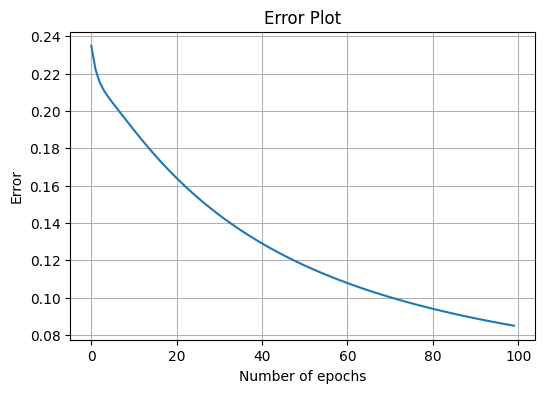

In [68]:
def plot_error_curve(error_list):
    plt.figure(figsize=(6, 4))
    plt.plot(range(len(error_list)), error_list)
    plt.title("Error Plot")
    plt.xlabel("Number of epochs")
    plt.ylabel("Error")
    plt.grid(True)
    plt.show()
plot_error_curve(error_list)